In [1]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import numpy as np 
from matplotlib import pyplot as plt
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import random_split
from torchvision import models,datasets
import os
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from PIL import Image
from torch.optim import lr_scheduler

In [2]:
USE_GPU = True

if USE_GPU and torch.cuda.is_available():
    print('using device: cuda')
else:
    print('using device: cpu')

device = torch.device("cuda:0" if USE_GPU else "cpu")

using device: cuda


In [3]:
#Hyperparamters
BATCH_SIZE = 32

In [4]:
train_transform = transforms.Compose([
        transforms.Resize(64),
        #transforms.RandomResizedCrop(224),
        #transforms.RandomHorizontalFlip(),
        #transforms.ColorJitter(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
])

test_transform = transforms.Compose([
        transforms.Resize(64),
        #transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ])

In [5]:
train_mnist = torchvision.datasets.MNIST(root = "./", train = True, download = True, transform = train_transform)

In [6]:
print(len(train_mnist)/32)
train_loader = torch.utils.data.DataLoader(train_mnist, batch_size = BATCH_SIZE, shuffle = True)


i,l = next(iter(train_loader))
print(i.shape)

1875.0
torch.Size([32, 1, 64, 64])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


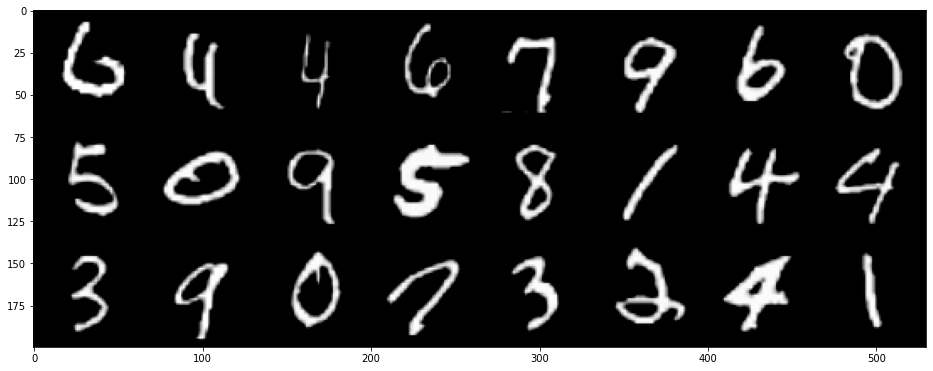

In [7]:
import matplotlib.pyplot as plt
import numpy
samples, labels = iter(train_loader).next()
plt.figure(figsize=(16,24))
grid_imgs = torchvision.utils.make_grid(samples[:24])
np_grid_imgs = grid_imgs.numpy()
# in tensor, image is (batch, width, height), so you have to transpose it to (width, height, batch) in numpy to show it.
plt.imshow(numpy.transpose(np_grid_imgs, (1,2,0)))

In [8]:
class Generator(nn.Module):
    def __init__(self,z_dim,image_dim):
        super(Generator, self).__init__()
        self.deconv1 = nn.ConvTranspose2d(z_dim,image_dim*8,4,1,0)
        self.deconv1_bn = nn.BatchNorm2d(image_dim*8)
        self.deconv2 = nn.ConvTranspose2d(image_dim*8,image_dim*4, 4, 2, 1)
        self.deconv2_bn = nn.BatchNorm2d(image_dim*4)
        self.deconv3 = nn.ConvTranspose2d(image_dim*4,image_dim*2, 4, 2, 1)
        self.deconv3_bn = nn.BatchNorm2d(image_dim*2)
        self.deconv4 = nn.ConvTranspose2d(image_dim*2,image_dim, 4, 2, 1)
        self.deconv4_bn = nn.BatchNorm2d(image_dim)
        self.deconv5 = nn.ConvTranspose2d(image_dim, 1, 4, 2, 1)

    def forward(self, input):
        # x = F.relu(self.deconv1(input))
        x = F.leaky_relu(self.deconv1_bn(self.deconv1(input)), 0.2)
        x = F.leaky_relu(self.deconv2_bn(self.deconv2(x)), 0.2)
        x = F.leaky_relu(self.deconv3_bn(self.deconv3(x)), 0.2)
        x = F.leaky_relu(self.deconv4_bn(self.deconv4(x)), 0.2)
        x = torch.tanh(self.deconv5(x))

        return x

class Discriminator(nn.Module):
    def __init__(self,image_dim):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(1, image_dim, 4, 2, 1)
        self.conv2 = nn.Conv2d(image_dim, image_dim*2, 2, 1)
        self.conv2_bn = nn.BatchNorm2d(image_dim*2)
        self.conv3 = nn.Conv2d(image_dim*2,image_dim*4, 4, 2, 1)
        self.conv3_bn = nn.BatchNorm2d(image_dim*4)
        self.conv4 = nn.Conv2d(image_dim*4,image_dim*8, 4, 2, 1)
        self.conv4_bn = nn.BatchNorm2d(image_dim*8)
        self.conv5 = nn.Conv2d(image_dim*8, 1, 4, 1, 0)

    def forward(self, input):
        x = F.leaky_relu(self.conv1(input), 0.2)
        x = F.leaky_relu(self.conv2_bn(self.conv2(x)), 0.2)
        x = F.leaky_relu(self.conv3_bn(self.conv3(x)), 0.2)
        x = F.leaky_relu(self.conv4_bn(self.conv4(x)), 0.2)
        x = torch.sigmoid(self.conv5(x))
        return x

In [9]:
#Define loss functions
lr = 1e-5
NUM_EPOCHS = 25
z_dim = 100
image_dim = 64

#d_false = g(noise)
#d_true = next(iter(train_loader))
#gen_loss = np.log(1 - d_false)
#disc_loss = np.log(d_true)+np.log(1-d_false)

d = Discriminator(image_dim)
d = d.to(device)

g = Generator(z_dim,image_dim)
g = g.to(device)
criterion = nn.BCELoss()
gen_opt = optim.Adam(g.parameters(), lr = lr)
disc_opt = optim.Adam(d.parameters(), lr = lr)
real_label = 0
fake_label = 1

EPOCH 1 / 25
Running Generator Loss : 1.6631844117164611
Running Discriminator Loss : 0.3988134378274282
torch.Size([64, 64])


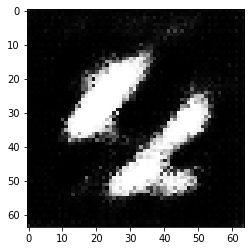

EPOCH 2 / 25
Running Generator Loss : 1.1831273034731546
Running Discriminator Loss : 0.5085877639134725
torch.Size([64, 64])


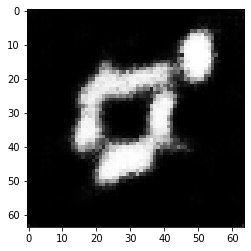

EPOCH 3 / 25
Running Generator Loss : 1.0763793420473735
Running Discriminator Loss : 0.5249891880671184
torch.Size([64, 64])


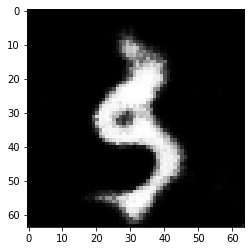

EPOCH 4 / 25
Running Generator Loss : 1.0980197164535523
Running Discriminator Loss : 0.5212122077624003
torch.Size([64, 64])


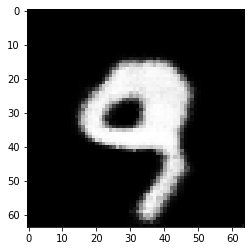

EPOCH 5 / 25
Running Generator Loss : 1.1085855477015178
Running Discriminator Loss : 0.5179009098052979
torch.Size([64, 64])


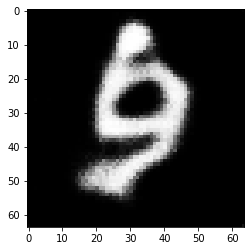

EPOCH 6 / 25
Running Generator Loss : 1.134726541741689
Running Discriminator Loss : 0.5091864076932271
torch.Size([64, 64])


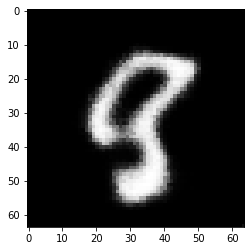

EPOCH 7 / 25
Running Generator Loss : 1.161159778436025
Running Discriminator Loss : 0.5017303148428599
torch.Size([64, 64])


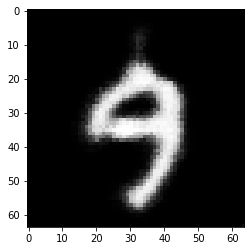

EPOCH 8 / 25
Running Generator Loss : 1.189400604248047
Running Discriminator Loss : 0.4928152956008911
torch.Size([64, 64])


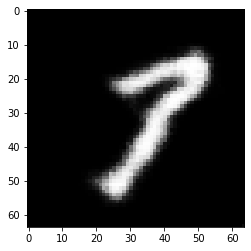

EPOCH 9 / 25
Running Generator Loss : 1.222241590722402
Running Discriminator Loss : 0.4827693695863088
torch.Size([64, 64])


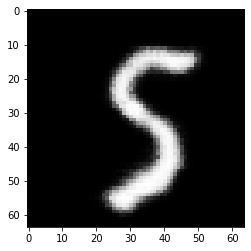

EPOCH 10 / 25
Running Generator Loss : 1.2588353162606558
Running Discriminator Loss : 0.4721991455713908
torch.Size([64, 64])


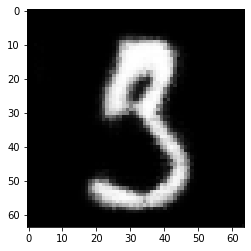

EPOCH 11 / 25
Running Generator Loss : 1.3006373655001322
Running Discriminator Loss : 0.4619785719394684
torch.Size([64, 64])


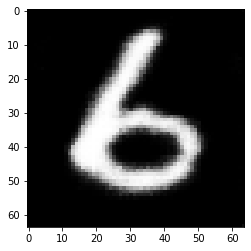

EPOCH 12 / 25
Running Generator Loss : 1.3361760593414307
Running Discriminator Loss : 0.4536427644411723
torch.Size([64, 64])


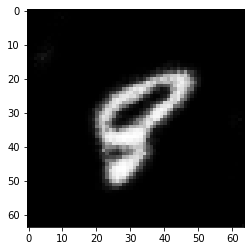

EPOCH 13 / 25
Running Generator Loss : 1.3751359859784444
Running Discriminator Loss : 0.44366127743721007
torch.Size([64, 64])


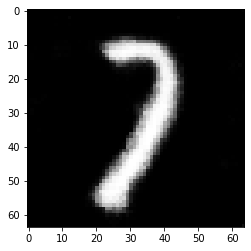

EPOCH 14 / 25
Running Generator Loss : 1.4047626085281373
Running Discriminator Loss : 0.43786374206542966
torch.Size([64, 64])


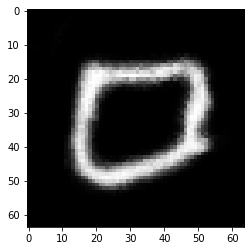

EPOCH 15 / 25
Running Generator Loss : 1.435731273206075
Running Discriminator Loss : 0.42953746905326845
torch.Size([64, 64])


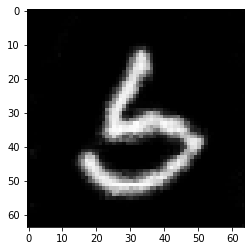

EPOCH 16 / 25
Running Generator Loss : 1.4734534965197246
Running Discriminator Loss : 0.4241686487992605
torch.Size([64, 64])


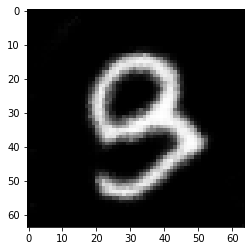

EPOCH 17 / 25
Running Generator Loss : 1.4950214979807537
Running Discriminator Loss : 0.41956665393511455
torch.Size([64, 64])


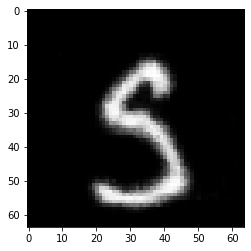

EPOCH 18 / 25
Running Generator Loss : 1.5260361033121745
Running Discriminator Loss : 0.41355172244707744
torch.Size([64, 64])


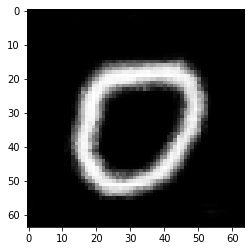

EPOCH 19 / 25
Running Generator Loss : 1.5509978668212892
Running Discriminator Loss : 0.41005556654930114
torch.Size([64, 64])


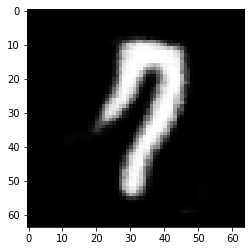

EPOCH 20 / 25
Running Generator Loss : 1.582266918849945
Running Discriminator Loss : 0.40465462838808697
torch.Size([64, 64])


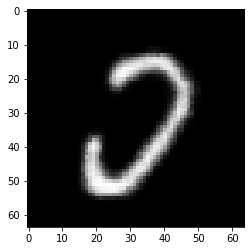

EPOCH 21 / 25
Running Generator Loss : 1.6176109940210979
Running Discriminator Loss : 0.3989851785182953
torch.Size([64, 64])


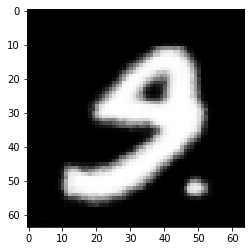

EPOCH 22 / 25
Running Generator Loss : 1.646146769841512
Running Discriminator Loss : 0.3965761525630951
torch.Size([64, 64])


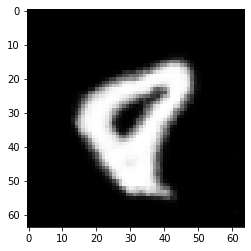

EPOCH 23 / 25
Running Generator Loss : 1.6802708687464396
Running Discriminator Loss : 0.38939447611172995
torch.Size([64, 64])


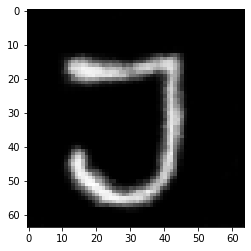

EPOCH 24 / 25
Running Generator Loss : 1.7159999579429626
Running Discriminator Loss : 0.38507559088071186
torch.Size([64, 64])


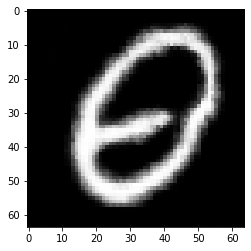

EPOCH 25 / 25
Running Generator Loss : 1.7570051245689393
Running Discriminator Loss : 0.37835443949699404
torch.Size([64, 64])


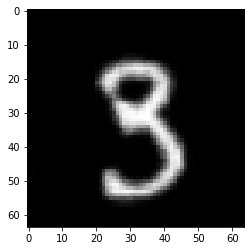

In [10]:
#Train
for epoch in range(NUM_EPOCHS):
    running_g_loss = 0
    running_d_loss =0
    gen_history = []
    disc_history = []
    g.train()
    d.train()
    for idx, (real_image,l) in enumerate(train_loader):
        noise = torch.randn(BATCH_SIZE, z_dim,1,1).to(device)
        #Add decaying random noise
        decaying_noise = torch.randn(BATCH_SIZE, 1,image_dim,image_dim).to(device)*(0.9**epoch)
        real_image = (real_image).to(device)
        real_image = real_image + decaying_noise
        fake_image = g(noise)+decaying_noise
        d_fake = d(fake_image).view(-1)
        d_real = d(real_image).view(-1)
        #forward pass
        #Swap the label for discriminator and generator
        disc_loss1 = criterion(d_real, torch.ones_like(d_real)*0.1)
        disc_loss2 = criterion(d_fake, torch.ones_like(d_fake)*0.9)
        disc_loss = (disc_loss1+disc_loss2)/2
        #backward
        
        disc_opt.zero_grad() 
        disc_loss.backward(retain_graph = True) #Need to make retain_graph as true if we are reusing computation
        disc_opt.step()
        
        out = d(fake_image).view(-1)
        gen_loss = criterion(out, torch.ones_like(out)*0.1)
        gen_opt.zero_grad()
        gen_loss.backward()
        gen_opt.step()
        
        running_g_loss += gen_loss.item()
        running_d_loss += disc_loss.item()
        gen_history.append(gen_loss.item())
        disc_history.append(disc_loss.item())
    
    print("EPOCH",epoch+1,"/",NUM_EPOCHS)
    print("Running Generator Loss :", running_g_loss/1875)
    print("Running Discriminator Loss :", running_d_loss/1875)
    g.eval()
    noise = torch.randn(1,z_dim,1,1).to(device)
    fake = g(noise).detach().cpu()
    #mg = np.transpose(mid_training,(1,2,0))
    with torch.no_grad():
        img = fake.reshape(64,64)
        img_grid = torchvision.utils.make_grid(fake,normalize = True)
        print(img.shape)
        plt.imshow(img, cmap = "gray")
        plt.show()

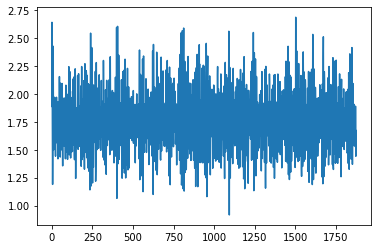

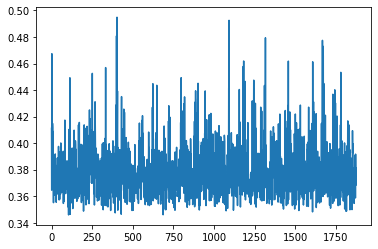

In [11]:
plt.plot(gen_history)
plt.show()
plt.plot(disc_history)
plt.show()